<a href="https://colab.research.google.com/github/KathyRoma/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# BAYES THEOREM as a function

def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	not_a = 1 - p_a
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

**1)Police test**

In [0]:
# arguments we need for calculation of probability that the peprson tasted positively on breathalizer is actually  drunk
true_positive_rate = 1
prob_drunk_prior = 0.001
false_positive_rate = 0.08

# I put my arguments to the formula
# final_probability = true_positive_rate * prob_drunk_prior/(true_positive_rate * prob_drunk_prior + false_positive_rate * (1 -prob_drunk_prior ))

def if_person_drunk(prob_drunk_prior, false_positive_rate, true_positive_rate):
  final_probability = true_positive_rate * prob_drunk_prior/(true_positive_rate * prob_drunk_prior + false_positive_rate * (1 -prob_drunk_prior ))
  return final_probability 

if_person_drunk(prob_drunk_prior, false_positive_rate, true_positive_rate)

0.012357884330202669

In [0]:
# The result we got above is not very high so we're still not sure 
## Every following test (if comes positive again) will increase the probability

def if_person_drunk(prob_drunk_prior, false_positive_rate, true_positive_rate, rep = 0,  target_reps = 4):
	final_probability = true_positive_rate * prob_drunk_prior/(true_positive_rate * prob_drunk_prior + false_positive_rate * (1 -prob_drunk_prior ))
	print(f"\nRep: {rep} of {target_reps}, probability: {final_probability}")
	if rep < target_reps:
		rep = rep+1
		if_person_drunk(final_probability, false_positive_rate, true_positive_rate, rep,  target_reps = 4)
	else:
		return final_probability


if_person_drunk(prob_drunk_prior, false_positive_rate, true_positive_rate)


Rep: 0 of 4, probability: 0.012357884330202669

Rep: 1 of 4, probability: 0.13525210993291495

Rep: 2 of 4, probability: 0.6615996951348605

Rep: 3 of 4, probability: 0.9606895076105054

Rep: 4 of 4, probability: 0.9967371577896734


In [0]:
#Four reps are enough in our case but what if we use a sevice with greater false positive rate or our true positive rate is different?
#Then we don't know how many tests we should perform.
#But we do know that we want to be at least 95% sure -- we do not want to arrest innocent people

true_positive_rate = 1
prob_drunk_prior = 0.001
false_positive_rate = 0.15


def if_person_drunk(prob_drunk_prior, false_positive_rate, true_positive_rate, rep = 0):
	final_probability = true_positive_rate * prob_drunk_prior/(true_positive_rate * prob_drunk_prior + false_positive_rate * (1 -prob_drunk_prior ))
	print(f"\nRep: {rep}, probability: {final_probability}")
	if final_probability < 0.95:
		rep = rep+1
		if_person_drunk(final_probability, false_positive_rate, true_positive_rate, rep)
	else:
		return final_probability	

## now we can play with arguments and see that if false positive rate is twice as high (15%), then we need to repeat the test five times

if_person_drunk(prob_drunk_prior, false_positive_rate, true_positive_rate)


Rep: 0, probability: 0.006629101756711967

Rep: 1, probability: 0.042593972952827186

Rep: 2, probability: 0.22874789123037778

Rep: 3, probability: 0.6641236266130941

Rep: 4, probability: 0.9294876170464543

Rep: 5, probability: 0.9887487957155537


**2)Explore scipy.stats.bayes_mvs**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df['capital-gain'].mean()

1077.6488437087312

In [0]:
sample = df.sample(1000)


In [0]:
sample['capital-gain'].mean()

846.462

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr= s / np.sqrt(n)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  margin_of_error = t * stderr
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, upper_bound, x_bar)

confidence_interval(sample['capital-gain'])

(519.3240151649939, 1173.5999848350061, 846.462)

In [0]:
frequentist = confidence_interval(sample['capital-gain'])

In [0]:
bayesian, _, _ = stats.bayes_mvs(sample['capital-gain'], alpha=.95)
bayesian

Mean(statistic=846.462, minmax=(519.3240151649939, 1173.5999848350061))

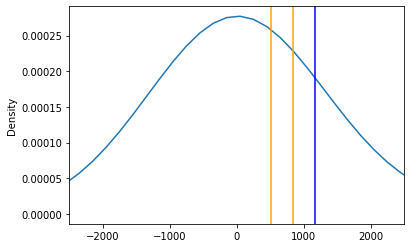

In [54]:
sample['capital-gain'].plot.density()
axes = plt.gca()
axes.set_xlim([-2500,2500])
plt.axvline(frequentist[0], color='orange')
plt.axvline(frequentist[1], color='blue')
plt.axvline(frequentist[2], color='orange')
plt.show()

In [0]:
bayesian.statistic
bayesian.minmax[1]
bayesian.minmax[0]

bayesian.minmax[1] - bayesian.minmax[0]

654.2759696700123

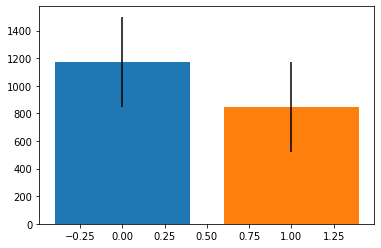

In [0]:
plt.bar(x=0, height=frequentist[1], yerr=(frequentist[2]-frequentist[1]))
plt.bar(x=1, height=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic))
plt.show()

In [0]:
# I want to check if race and education
# My boring hypothesies that there is no connection between those two.

observed = pd.crosstab(df['race'], df['education'], margins=True)
observed

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
race,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,14,13,5,3,2,7,3,7,16,20,2,116,5,0,2,71,286
Asian-Pac-Islander,11,18,4,3,15,10,8,27,35,252,26,193,81,6,35,171,895
Black,119,128,51,13,18,49,77,100,108,301,8,1061,78,4,15,687,2817
Other,8,7,11,9,11,15,8,8,6,23,1,69,5,2,4,44,231
White,668,882,306,123,242,476,359,866,1142,4448,338,8401,1458,33,486,5705,25933
All,820,1048,377,151,288,557,455,1008,1307,5044,375,9840,1627,45,542,6678,30162


In [0]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistic 687.5793983319

 p-value 2.2489448137236068e-97

 degrees of freedom 80

 expected frequencies table: 
 [[7.77534646e+00 9.93727206e+00 3.57476295e+00 1.43180160e+00
  2.73085339e+00 5.28154632e+00 4.31436907e+00 9.55798687e+00
  1.23931437e+01 4.78278629e+01 3.55579869e+00 9.33041575e+01
  1.54274252e+01 4.26695842e-01 5.13931437e+00 6.33216630e+01
  2.86000000e+02]
 [2.43319409e+01 3.10974073e+01 1.11867582e+01 4.48063789e+00
  8.54585240e+00 1.65279159e+01 1.35012599e+01 2.99104834e+01
  3.87827399e+01 1.49671109e+02 1.11274120e+01 2.91983290e+02
  4.82781314e+01 1.33528944e+00 1.60828194e+01 1.98156952e+02
  8.95000000e+02]
 [7.65844440e+01 9.78786553e+01 3.52101651e+01 1.41027452e+01
  2.68979511e+01 5.20213845e+01 4.24950269e+01 9.41428287e+01
  1.22068132e+02 4.71087726e+02 3.50233738e+01 9.19013328e+02
  1.51954744e+02 4.20280485e+00 5.06204496e+01 6.23696240e+02
  2.81700000e+03]
 [6.28008753e+00 8.02625821e+00 2.88730853e+00 1.15645514e+00
  2.20568928e+00 4.2

In [0]:
import scipy
scipy.stats.bayes_mvs(observed, alpha=.95)

(Mean(statistic=1182.8235294117646, minmax=(364.11339001400313, 2001.5336688095263)),
 Variance(statistic=17724791.18003565, minmax=(13425847.274616063, 23370714.077505503)),
 Std_dev(statistic=4199.464159324233, minmax=(3664.1298113762377, 4834.326641581587)))

In [0]:
# The p-value is so small that I vigorously regect my boring hypothesis

**3) The difference between Bayesian and Frequentist statistics**

Bayesian statistics uses prior observed probabilities to update likeliness of events according to what happened before. It gives us an opportunity to infer results from smaller samples. It is also considered  to be more intuitive and reflects how human think.

Frequentist statistics relies on bigger samples, carefully randomised and independent. It only tells us if our Null Hypothesis is a good explanation of data we observed.


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!